# Gettting a few libraries

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, json
from PIL import Image

# Data Visualization

## Classes weights in training set

array([[<Axes: title={'center': 'label'}>]], dtype=object)

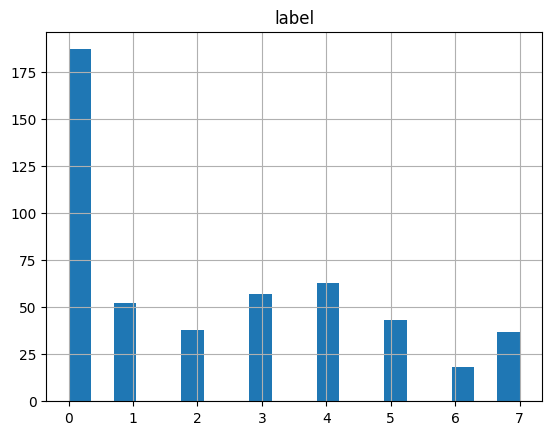

In [2]:
df_train = pd.read_csv("/kaggle/input/eclipse-megamovie/train.csv")
df_train.hist(bins=20)

## Reading labels mapping

In [3]:
import json
with open("/kaggle/input/eclipse-megamovie/label_num_to_phase_map.json") as f:
    labels_map = json.load(f)

In [4]:
labels_map

{'TotalSolarEclipse': 0,
 '0to25percentPartialEclipse': 1,
 '26to55percentPartialEclipse': 2,
 '56to95percentPartialEclipse': 3,
 'Darks': 4,
 'DiamondRing_BaileysBeads_SolarEclipse': 5,
 'Flats': 6,
 'NotASolarEclipse': 7}

# Histograms of width, height on train images

array([[<Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

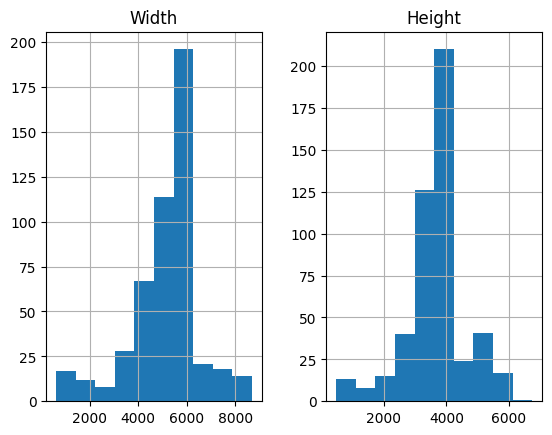

In [5]:
# Specify the folder path containing images
folder_path = '/kaggle/input/eclipse-megamovie/train'

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

# Create an empty DataFrame
data = {col:[] for col in ['Width', 'Height']}

# Saving images and filename
images = []
paths = []

# Iterate through image files and add their shapes to the DataFrame
for image_file in image_files:
    file_path = os.path.join(folder_path, image_file)
    paths.append(file_path)
    with Image.open(file_path) as img:
        images.append(img)
        width, height = img.size
        channels = len(img.getbands())
        for col, value in {'Width': width, 'Height': height}.items():
            data[col].append(value)

# Display the resulting DataFrame
shape_df = pd.DataFrame(data)
shape_df.hist()

# Plotting images from each class

In [6]:
# Function to get label name from image path
def get_label(path):
    basename = os.path.basename(path)
    label = df_train.loc[df_train["image_id"] == basename].iloc[0,1]
    label_name = list(labels_map.keys())[label]
    return label_name

In [7]:
for label_name, index in labels_map.items():
    print(label_name, index)

TotalSolarEclipse 0
0to25percentPartialEclipse 1
26to55percentPartialEclipse 2
56to95percentPartialEclipse 3
Darks 4
DiamondRing_BaileysBeads_SolarEclipse 5
Flats 6
NotASolarEclipse 7


In [8]:
labels_nums = df_train.label.unique().tolist()
labels_nums

[0, 1, 2, 3, 4, 5, 6, 7]

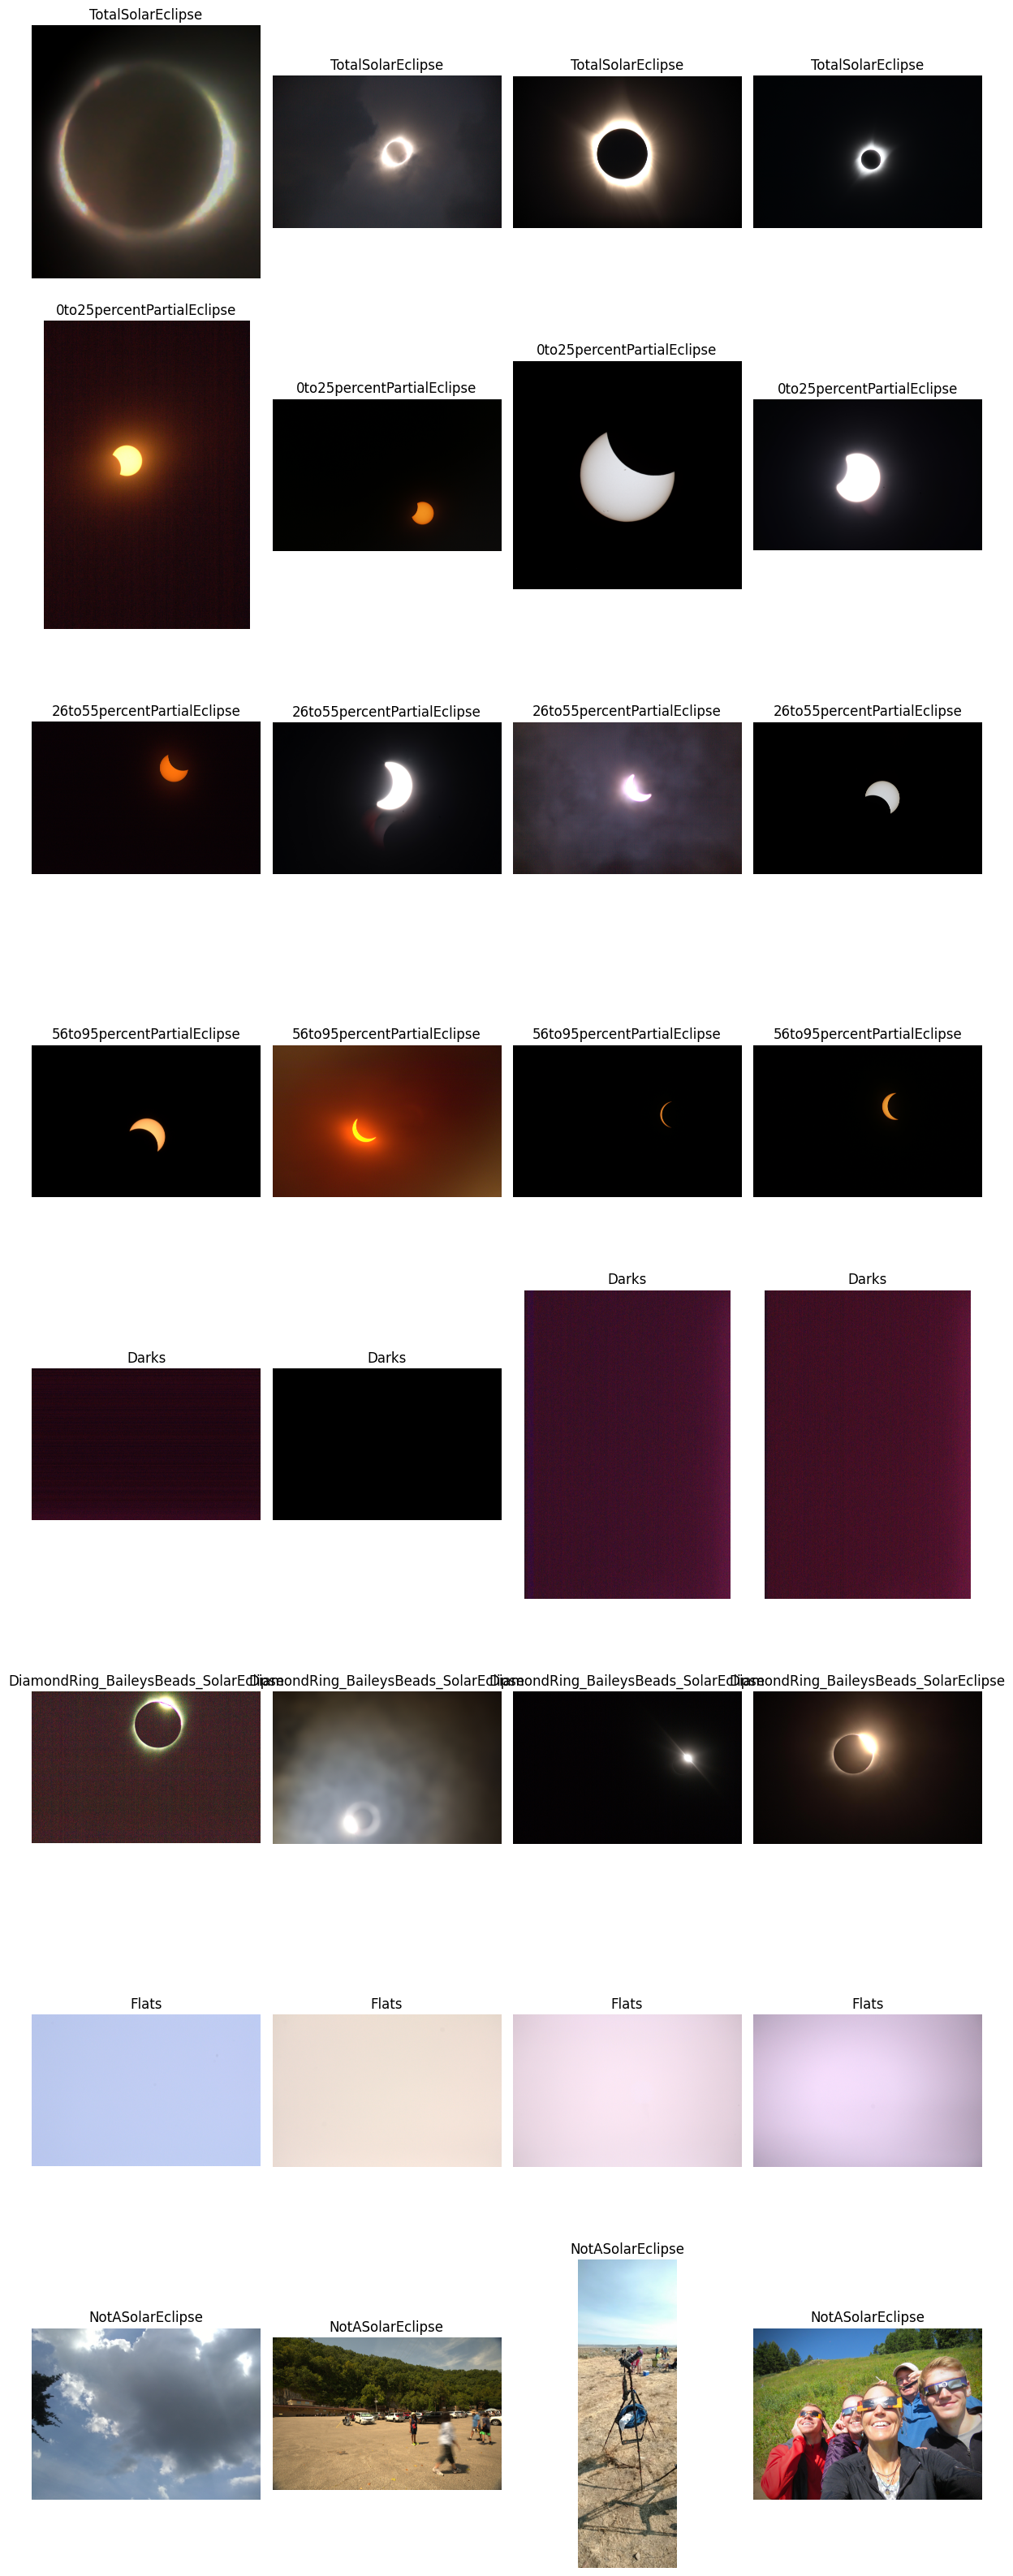

In [9]:
n_labels = len(labels_nums)
image_per_class = 4

fig, axes = plt.subplots(n_labels, image_per_class, figsize=(12, 4*n_labels))

for label_num in range(n_labels):
    for j, (_, row) in enumerate(df_train[df_train["label"]==label_num].sample(image_per_class).iterrows()):
        path = os.path.join("/kaggle/input/eclipse-megamovie/train", row.image_id)
        img = Image.open(path)
        axes[label_num, j].imshow(img)
        axes[label_num, j].axis('off')
        axes[label_num, j].set_title(get_label(path))

plt.tight_layout()

plt.show()